In [273]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression

# Fetch Data:

In [274]:
df = pd.read_csv('https://raw.githubusercontent.com/stay-fcsd/data-final-project/main/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Hot Encoding:
Convert categorical features into dummy columns in the feature table with a binary value for each of the possible categorical values

In [275]:
hot_encoded_df = df.copy()

gender_column = df[["Sex"]]

hot_encoded_df['Male'] = gender_column
hot_encoded_df['Female'] = gender_column

hot_encoded_df = hot_encoded_df.drop('Sex', 1)

chest_pain_type_column = df[["ChestPainType"]]
hot_encoded_df['ATA'] = chest_pain_type_column
hot_encoded_df['TA'] = chest_pain_type_column
hot_encoded_df['ASY'] = chest_pain_type_column
hot_encoded_df['NAP'] = chest_pain_type_column
hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)

resting_ECG_column = df[["RestingECG"]]
hot_encoded_df['Normal'] = resting_ECG_column
hot_encoded_df['ST'] = resting_ECG_column
hot_encoded_df['LVH'] = resting_ECG_column
hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)

ST_slope_column = df[["ST_Slope"]]

hot_encoded_df['Up'] = ST_slope_column
hot_encoded_df['Flat'] = ST_slope_column
hot_encoded_df['Down'] = ST_slope_column

hot_encoded_df = hot_encoded_df.drop('ST_Slope', 1)

hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['M'], '1')
hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['F'], '0')

hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['M'], '0')
hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['F'], '1')

hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ATA'], '1')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['TA'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ASY'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['NAP'], '0')

hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ATA'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['TA'], '1')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ASY'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['NAP'], '0')

hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ATA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['TA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ASY'], '1')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['NAP'], '0')

hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ATA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['TA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ASY'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['NAP'], '1')

hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['Normal'], '1')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['ST'], '0')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['LVH'], '0')

hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['Normal'], '0')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['ST'], '1')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['LVH'], '0')

hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['Normal'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['ST'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['LVH'], '1')

hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Up'], '1')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Flat'], '0')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Down'], '0')

hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Up'], '0')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Flat'], '1')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Down'], '0')

hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Up'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Flat'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Down'], '1')

hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['Y'], '1')
hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['N'], '0')

heart_disease_column = hot_encoded_df.pop('HeartDisease')
hot_encoded_df.insert(19, 'HeartDisease', heart_disease_column);

hot_encoded_df

/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_19319/2609551469.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('Sex', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_19319/2609551469.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_19319/2609551469.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_19319/2609551469.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,48,138,214,0,108,1,1.5,0,1,0,0,1,0,1,0,0,0,1,0,1
4,54,150,195,0,122,0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,0,0,1,0,0,1,0,0,0,1,0,1
914,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
916,57,130,236,0,174,0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1


# Scale Data:

In [276]:
feature_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']

X = hot_encoded_df[feature_cols]

scaler = StandardScaler()
scaler.fit(X.values)
heart_disease_df_scale = scaler.transform(X.values)
df_scale = pd.DataFrame(heart_disease_df_scale, columns=X.columns)
df_scale.insert(19, 'HeartDisease', heart_disease_column);

# Split data and train model using Logistic Regression

In [277]:
X = df_scale[feature_cols]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
df_scale.head()

,Age,Male,Female,ATA,ASY,TA,NAP,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,ExerciseAngina,Oldpeak,Up,Flat,Down,HeartDisease
0,-1.433140,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,0.410909,0.825070,-0.551341,0.814275,-0.490449,-0.507478,1.382928,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
1,-0.478484,-1.938163,1.938163,-0.481887,-1.084138,-0.229679,1.876744,1.491752,-0.171961,-0.551341,0.814275,-0.490449,-0.507478,0.754157,-0.823556,0.105664,-0.869056,0.997824,-0.271448,1
2,-1.751359,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,-0.129513,0.770188,-0.551341,-1.228087,2.038947,-0.507478,-1.525138,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
3,-0.584556,-1.938163,1.938163,-0.481887,0.922392,-0.229679,-0.532838,0.302825,0.139040,-0.551341,0.814275,-0.490449,-0.507478,-1.132156,1.214246,0.574711,-0.869056,0.997824,-0.271448,1
4,0.051881,0.515952,-0.515952,-0.481887,-1.084138,-0.229679,1.876744,0.951331,-0.034755,-0.551341,0.814275,-0.490449,-0.507478,-0.581981,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
my_logreg = LogisticRegression(max_iter=2000)
my_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

# Estimate the Probability of an Event Happening:
Estimate the likelihood of each label happening

In [279]:
# Predict the binary label
y_predict_lr = my_logreg.predict(X_test)

# Estimate the probability of each lable
y_predict_prob_log_r = my_logreg.predict_proba(X_test)

In [280]:
# print the actual label of the testing set:
print('THIS IS THE ACTUAL LABLE')
print(y_test)

# print the predicted label for the testing set:
print('PREDICTED LABEL')
print(y_predict_lr)

# print the estmiated likelihood of both label for the testing set:
print('ESTMIATE THE LIKELIHOOD OF BOTH LABLE')
print(y_predict_prob_log_r)


print('ESTIMATE THE LIKELIHOOD OF LABEL=1')
print(y_predict_prob_log_r[:,1])

THIS IS THE ACTUAL LABLE
476    0
244    1
701    0
634    0
687    0
      ..
90     0
695    1
214    1
511    1
833    0
Name: HeartDisease, Length: 230, dtype: int64
PREDICTED LABEL
[1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 0]
ESTMIATE THE LIKELIHOOD OF BOTH LABLE
[[0.42952573 0.57047427]
 [0.06103703 0.93896297]
 [0.80756328 0.19243672]
 [0.76560882 0.23439118]
 [0.905484   0.094516  ]
 [0.04731256 0.95268744]
 [0.02469753 0.97530247]
 [0.14218146 0.85781854]
 [0.90480197 0.09519803]
 [0.9193517  0.0806483 ]
 [0.97770097 0.02229903]
 [0.39110226 0.60889774]
 [0.9614

# Accuracy Evaluation

In [281]:
score_logreg = accuracy_score(y_test, y_predict_lr)
print(score_logreg)

0.8869565217391304


# True Positive Rate (TPR) and False Positive Rate (FPR):

In [282]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_log_r[:,1], pos_label=1)


In [283]:
print(fpr)

[0.         0.         0.         0.00952381 0.00952381 0.01904762
 0.01904762 0.02857143 0.02857143 0.03809524 0.03809524 0.04761905
 0.04761905 0.05714286 0.05714286 0.06666667 0.06666667 0.08571429
 0.08571429 0.0952381  0.0952381  0.1047619  0.1047619  0.11428571
 0.11428571 0.12380952 0.12380952 0.16190476 0.16190476 0.17142857
 0.17142857 0.18095238 0.18095238 0.2        0.2        0.26666667
 0.26666667 0.27619048 0.27619048 0.40952381 0.40952381 0.41904762
 0.41904762 0.67619048 0.67619048 0.68571429 0.68571429 1.        ]


In [284]:
print(tpr)

[0.    0.008 0.36  0.36  0.376 0.376 0.584 0.584 0.592 0.592 0.632 0.632
 0.704 0.704 0.736 0.736 0.792 0.792 0.808 0.808 0.824 0.824 0.832 0.832
 0.904 0.904 0.912 0.912 0.92  0.92  0.936 0.936 0.944 0.944 0.952 0.952
 0.96  0.96  0.968 0.968 0.976 0.976 0.984 0.984 0.992 0.992 1.    1.   ]


# AUC:

In [285]:
AUC = metrics.auc(fpr, tpr)

print(AUC)

0.9432380952380953


# ROC Curve:

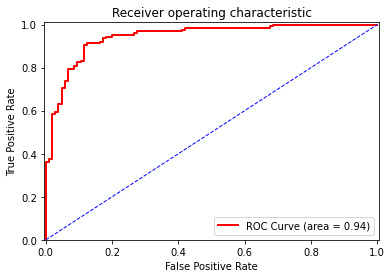

In [286]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Repeat the Process with Smaller Number of Features

# Using Worst Rated Features from KNN model

In [287]:
log_reg_features2 = ['ST', 'RestingBP']

# 'Up', 'ASY', 'Flat', 'Age', 'RestingBP', 'FastingBS'

X2 = df_scale[log_reg_features2]

y2 = df_scale['HeartDisease']


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=4)

my_logreg2 = LogisticRegression()
my_logreg2.fit(X_train2, y_train2)


y_predict_prob_lr2 = my_logreg2.predict_proba(X_test2)


fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)


0.580152380952381


# Using Best Rated Features from KNN model

In [288]:
log_reg_features3 = ['Up', 'ASY']

# 'Up', 'ASY', 'Flat', 'Age', 'RestingBP', 'FastingBS'

X3 = df_scale[log_reg_features3]

y3 = df_scale['HeartDisease']


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=4)

my_logreg3 = LogisticRegression()
my_logreg3.fit(X_train3, y_train3)


y_predict_prob_lr3 = my_logreg3.predict_proba(X_test3)


fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3, y_predict_prob_lr3[:,1], pos_label=1)
AUC3 = metrics.auc(fpr3, tpr3)
print(AUC3)


0.8808380952380952


# Using Mix of Best, Least, and Average Features

In [289]:
log_reg_features4 = ['Up', 'ASY', 'Flat', 'Age', 'RestingBP', 'FastingBS']


X4 = df_scale[log_reg_features4]

y4 = df_scale['HeartDisease']


X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=4)

my_logreg4 = LogisticRegression()
my_logreg4.fit(X_train4, y_train4)


y_predict_prob_lr4 = my_logreg4.predict_proba(X_test4)


fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test4, y_predict_prob_lr4[:,1], pos_label=1)
AUC4 = metrics.auc(fpr4, tpr4)
print(AUC4)

0.9109714285714285


# Comparing ROC Curves:
All Features vs the 3 best ranked features form KNN model

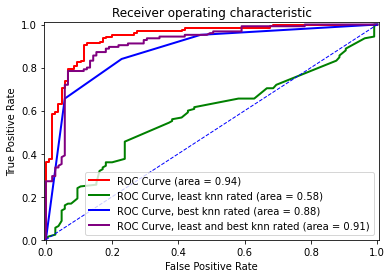

In [290]:
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve, least knn rated (area = %0.2f)' % AUC2)

# Roc Curve3:
plt.plot(fpr3, tpr3, color='blue', lw=2, 
         label='ROC Curve, best knn rated (area = %0.2f)' % AUC3)

# Roc Curve4:
plt.plot(fpr4, tpr4, color='purple', lw=2, 
         label='ROC Curve, least and best knn rated (area = %0.2f)' % AUC4)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Results:
I obtained a ROC of 0.94 when using all the features. When using only the two best ranked features based on knn model the ROC obtained was 0.88. When using the worst ranked features based on knn model the ROC obtained was 0.58. Finally, the ROC obtained when combining best and worst ranked features based on knn model the ROC was 0.91, which is greater than when only using either the best or worst features.